# Sprint ゲート付きリカレントニューラルネットワーク

# 1.このSprintについて

**<u>Sprintの目的</u>**

- 発展的なRNNの手法を理解する
- ドキュメントを網羅的に読む

**<u>どのように学ぶか</u>**

Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。

## 2.KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれらすべてを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

**<u>【問題1】各種手法の実行</u>**

Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN
GRU
LSTM
ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


**LSTMのサンプルコード**


[keras-apache-mxnet/imdb_lstm.py at master · awslabs/keras-apache-mxnet](https://github.com/awslabs/keras-apache-mxnet/blob/master/examples/imdb_lstm.py)


**ConvLSTM2Dのサンプルコード**


[keras-apache-mxnet/conv_lstm.py at master · awslabs/keras-apache-mxnet](https://github.com/awslabs/keras-apache-mxnet/blob/master/examples/conv_lstm.pym)


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。すべて実行する上での実行時間を考慮した数に設定してください。

**LSTM**

In [ ]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3, # 15
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/3
782/782 [==============================] - 247s 314ms/step - loss: 0.5125 - accuracy: 0.7271 - val_loss: 0.4149 - val_accuracy: 0.8284
Epoch 2/3
782/782 [==============================] - 246s 315ms/step - loss: 0.2534 - accuracy: 0.9015 - val_loss: 0.3680 - val_accuracy: 0.8395
Epoch 3/3
782/782 [==============================] - 15s 20ms/step - loss: 0.4555 - accuracy: 0.8282
Test score: 0.4554802477359772
Test accuracy: 0.8282399773597717


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


**SimpleRNN**

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3, # 15
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/3
782/782 [==============================] - 94s 119ms/step - loss: 0.6998 - accuracy: 0.5165 - val_loss: 0.6763 - val_accuracy: 0.5486
Epoch 2/3
782/782 [==============================] - 91s 117ms/step - loss: 0.6420 - accuracy: 0.6217 - val_loss: 0.5741 - val_accuracy: 0.6966
Epoch 3/3
782/782 [==============================] - 5s 7ms/step - loss: 0.4970 - accuracy: 0.7741
Test score: 0.4969502389431
Test accuracy: 0.7740799784660339


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


**GRU**

In [ ]:
from keras.layers import GRU

In [ ]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3, # 15
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/3
782/782 [==============================] - 226s 287ms/step - loss: 0.5273 - accuracy: 0.7092 - val_loss: 0.3642 - val_accuracy: 0.8401
Epoch 2/3
782/782 [==============================] - 224s 286ms/step - loss: 0.2402 - accuracy: 0.9058 - val_loss: 0.3859 - val_accuracy: 0.8469
Epoch 3/3
782/782 [==============================] - 15s 19ms/step - loss: 0.4576 - accuracy: 0.8296
Test score: 0.45759862661361694
Test accuracy: 0.8295999765396118


**ConvLSTM2D**

Epoch 1/3
95/95 [==============================] - 81s 489ms/step - loss: 0.8933 - val_loss: 0.7168
Epoch 2/3
95/95 [==============================] - 45s 474ms/step - loss: 0.7775 - val_loss: 0.7488
Epoch 3/3
95/95 [==============================] - 45s 477ms/step - loss: 0.7257 - val_loss: 0.7260


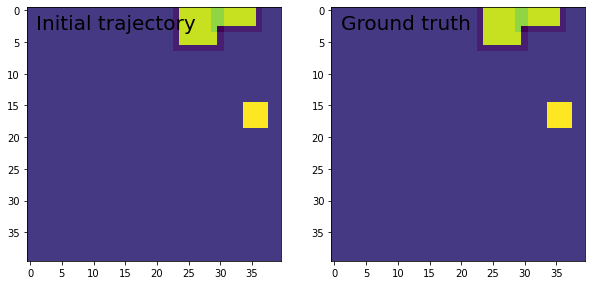

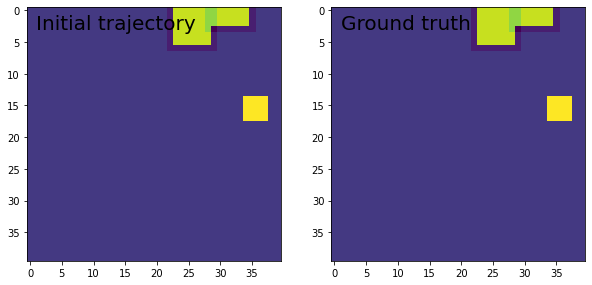

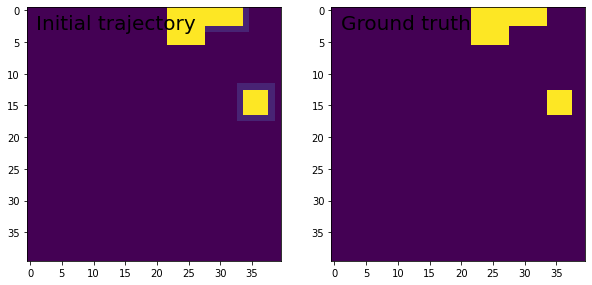

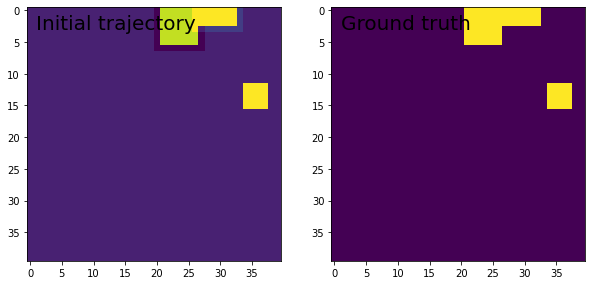

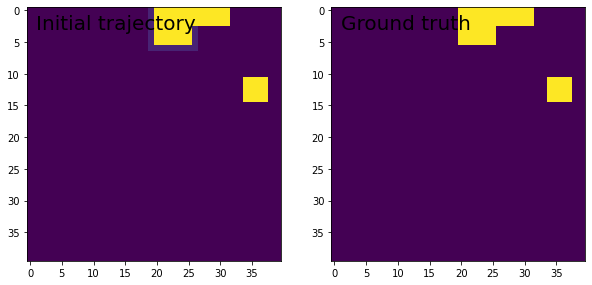

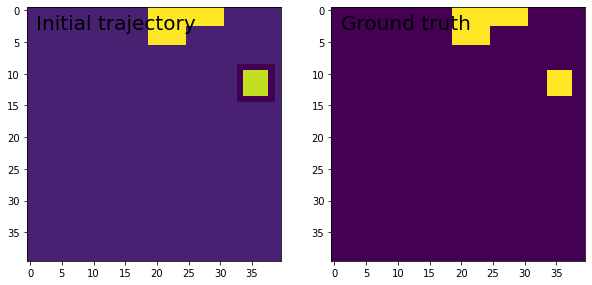

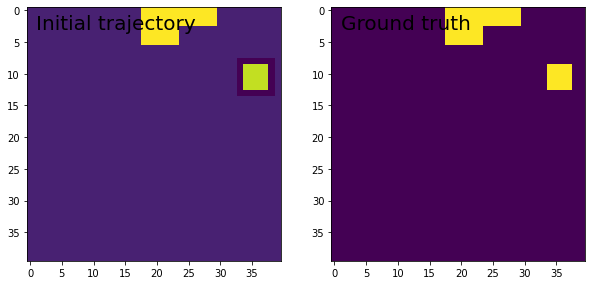

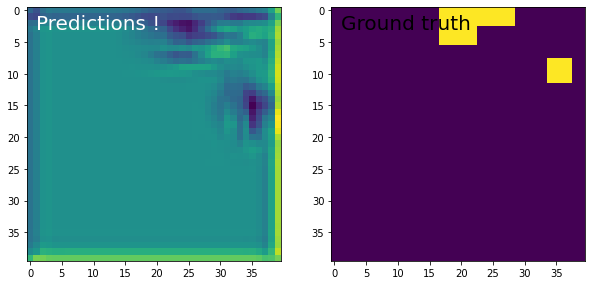

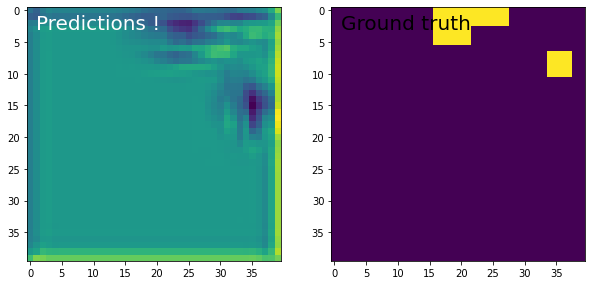

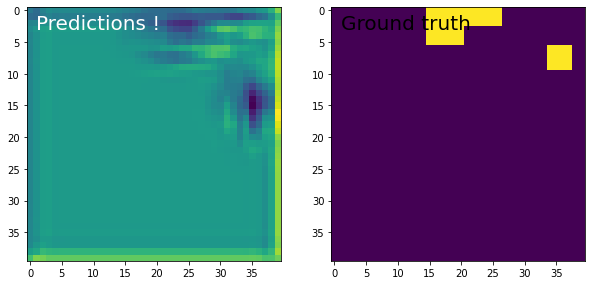

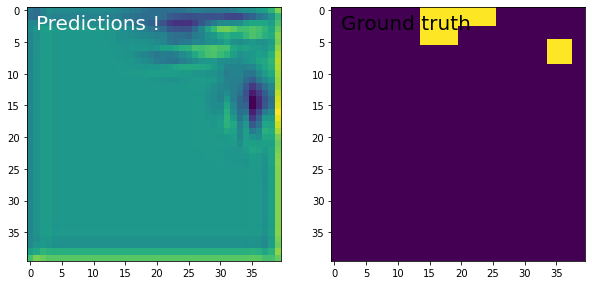

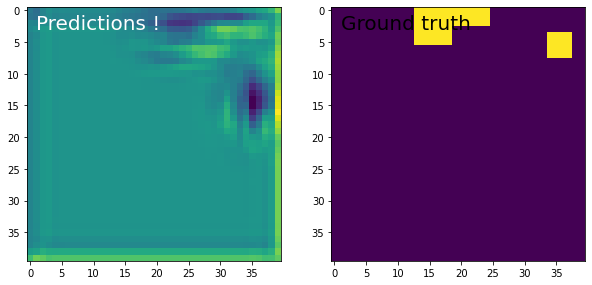

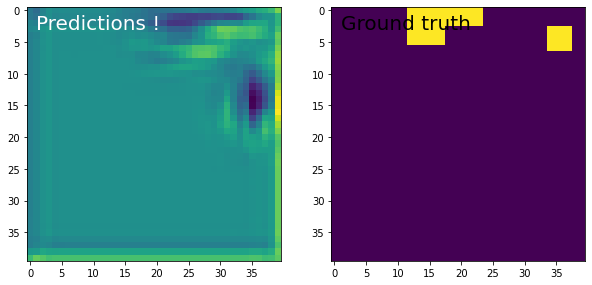

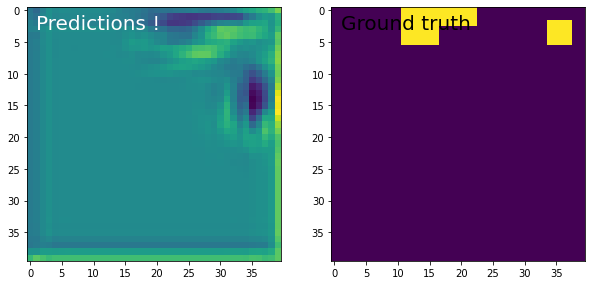

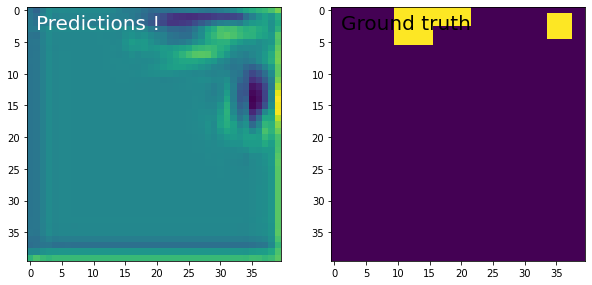

In [ ]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
# epochs=300 -> 3
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

Epoch 1/30
95/95 [==============================] - 44s 461ms/step - loss: 0.6840 - val_loss: 0.6935
Epoch 2/30
95/95 [==============================] - 44s 467ms/step - loss: 0.6621 - val_loss: 0.6679
Epoch 3/30
95/95 [==============================] - 45s 469ms/step - loss: 0.6440 - val_loss: 0.6931
Epoch 4/30
95/95 [==============================] - 45s 471ms/step - loss: 0.6279 - val_loss: 0.6940
Epoch 5/30
95/95 [==============================] - 45s 472ms/step - loss: 0.6128 - val_loss: 0.6391
Epoch 6/30
95/95 [==============================] - 45s 473ms/step - loss: 0.5987 - val_loss: 0.5979
Epoch 7/30
95/95 [==============================] - 45s 473ms/step - loss: 0.5850 - val_loss: 0.5763
Epoch 8/30
95/95 [==============================] - 45s 473ms/step - loss: 0.5719 - val_loss: 0.5601
Epoch 9/30
95/95 [==============================] - 45s 474ms/step - loss: 0.5594 - val_loss: 0.5449
Epoch 10/30
95/95 [==============================] - 45s 474ms/step - loss: 0.5477 - val_lo

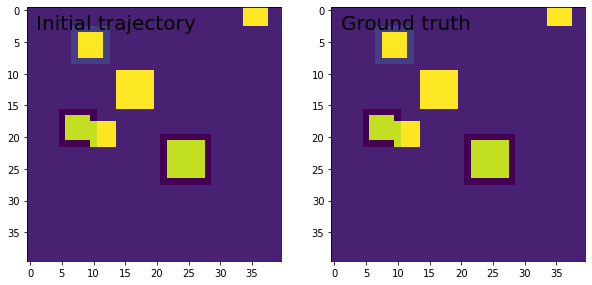

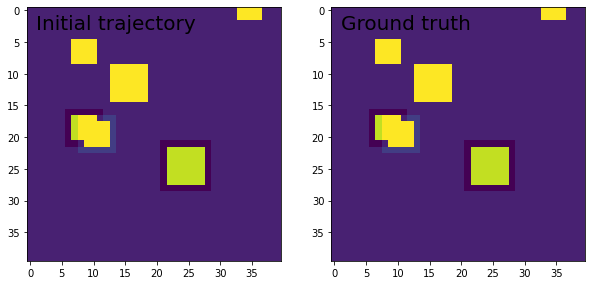

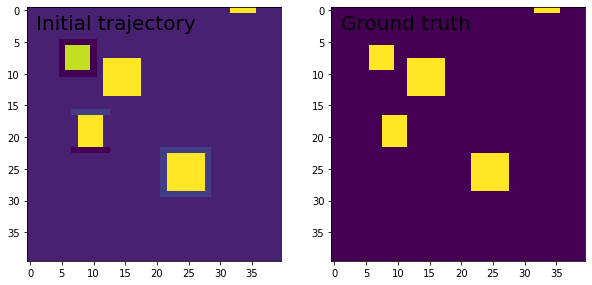

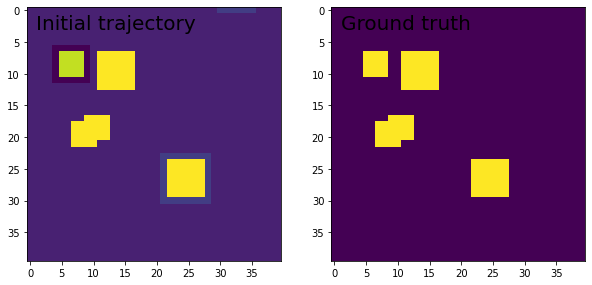

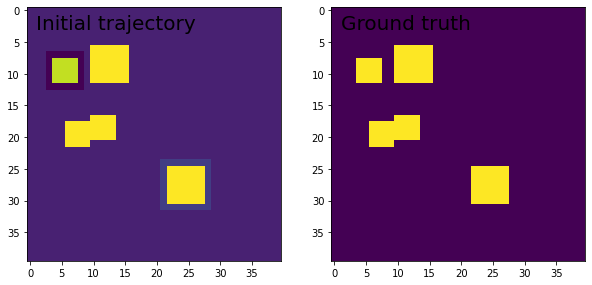

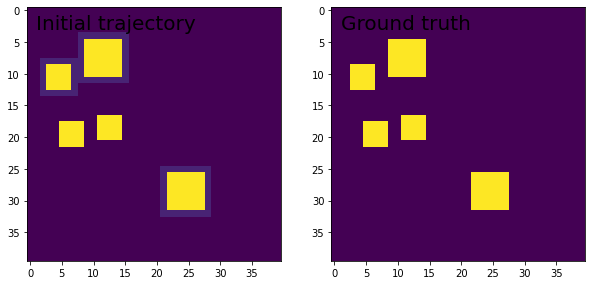

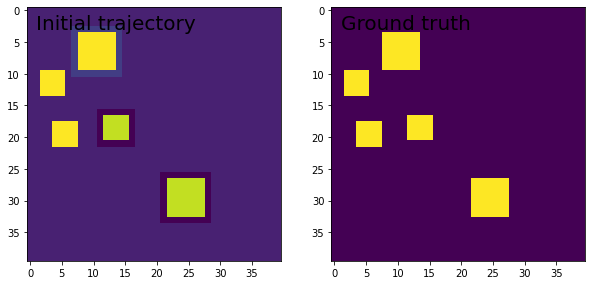

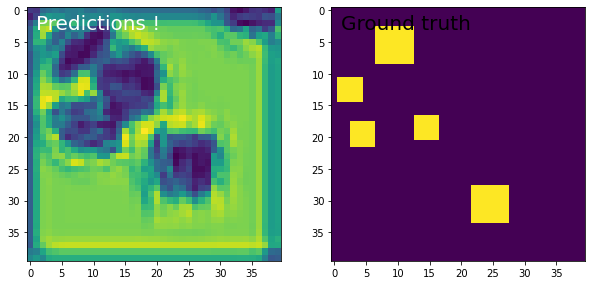

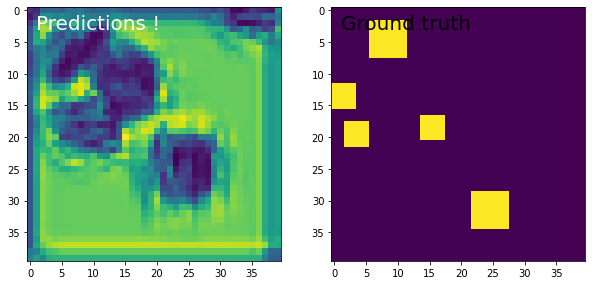

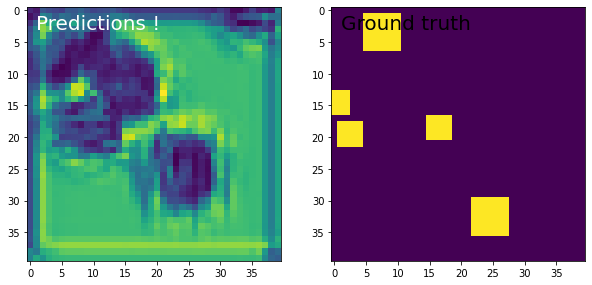

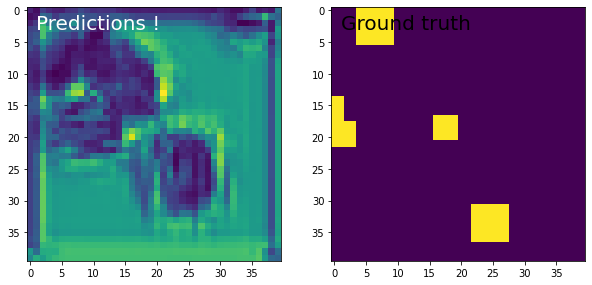

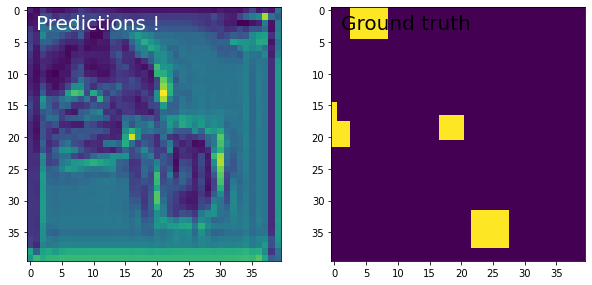

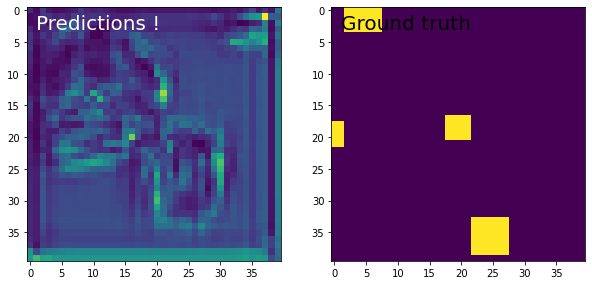

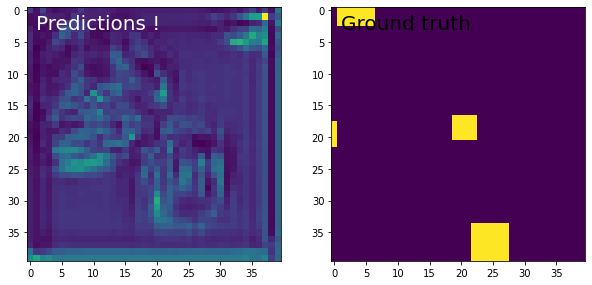

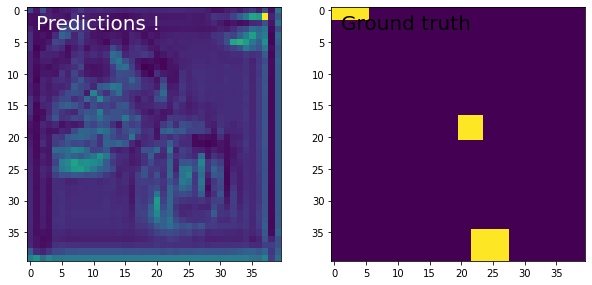

In [ ]:
# Train the network
# epochs=300 -> 30
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=30, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

**考察：同じく３epochで学習した結果、精度的にGRUとLSTMはSimpleRNNに比べて高かったことが分かった。SimpleRNN以外はゲート付きリカレントニューラルネットワークなので、それによる精度の向上が見られたと言えよう。**

Test accuracy: 

|LSTM|SimpleRNN|GRU|
|:------------:|:------------:|:------------:|
|0.8282399773597717|0.7740799784660339|0.8295999765396118|

なお、処理時間から見ると、SimpleRNNに比べ、GRUとLSTM両方とも長くなっている。その中、GRUは若干速い（LSTMより10％ぐらい短縮）。

**ConvLSTM2Dは違うタスクなので、単純比較はできないが、ConvLSTM2D自体3epochに比べると30epochのほうが少し輪郭が見えるか見えないかぐらいになった。**

【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。

[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

## 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


|関連クラス|クラスの説明|
|:------------|:------------|
|RNN|Recurrentレイヤーに対する基底クラス|
|SimpleRNNCell|SimpleRNNのCellクラス|
|GRUCell|GRUレイヤーのためのCellクラス|
|LSTMCell|LSTMレイヤーのためのcellクラス|
|StackedRNNCells|RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．効率的なstacked RNNを実装するために使われる|
|CuDNNGRU|CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作|
|CuDNNLSTM|CuDNNを利用した高速なLSTM実装．TensorFlowバックエンドでGPU上でのみ動作|


